<a href="https://colab.research.google.com/github/Azeemuddin47/MachineLearning/blob/main/NumberRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

In [ ]:
from skimage import io, transform

In [ ]:
# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 20

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

11493376/11490434 [==============================] - 0s 0us/step


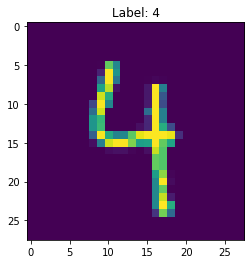

In [ ]:
index = random.randrange(1000)
plt.imshow(orig_test[index], )
plt.title('Label: %d' % y_test[index])
plt.show()

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4776 - accuracy: 0.8503 - val_loss: 0.0443 - val_accuracy: 0.9852
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0849 - accuracy: 0.9740 - val_loss: 0.0369 - val_accuracy: 0.9878
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.0328 - val_accuracy: 0.9897
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0346 - val_accuracy: 0.9880
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0311 - val_accuracy: 0.9903
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0310 - val_accuracy: 0.9897
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0302 - val_accuracy: 0.9905
Epoch 

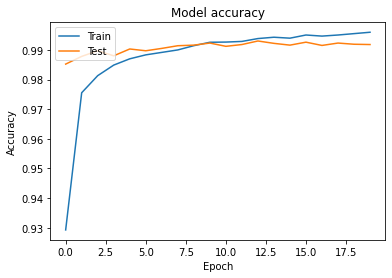

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Original image shape (281, 171, 4)


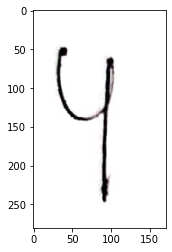

In [ ]:
rgb = io.imread('4.png')
print(f'Original image shape {rgb.shape}')
plt.imshow(rgb)

Grayscale image shape(281, 171)


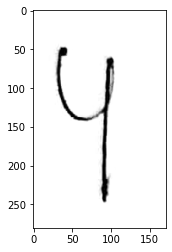

In [ ]:
gray = np.dot(rgb[..., :], [0.299, 0.587, 0.114, 0])
print(f'Grayscale image shape{gray.shape}')
plt.imshow(gray, cmap = 'gray')

Resized image shape (28, 28)


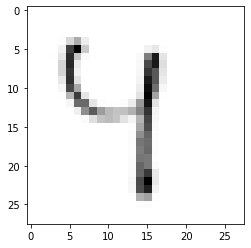

In [ ]:
gray28x28 = transform.resize(gray, (img_rows, img_cols))
print(f'Resized image shape {gray28x28.shape}')
plt.imshow(gray28x28, cmap = 'gray')

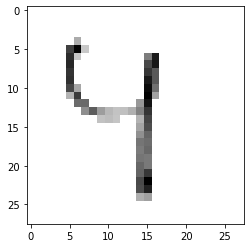

In [ ]:
vectorized_filter = np.vectorize(lambda v: 255 if v > 220 else v)
filtered = vectorized_filter(gray28x28)
plt.imshow(filtered, cmap = 'gray')

In [ ]:
inverted = 255 - filtered
reshaped = inverted.reshape(img_rows, img_cols, 1) / 255.0
batch = np.array([reshaped])
plt.imshow(inverted, cmap = 'gray')

In [ ]:
batch.max()

0.5843137254901961

In [ ]:
predictions = model.predict(batch)
most_likely = predictions.argmax(1)
most_likely

array([1])

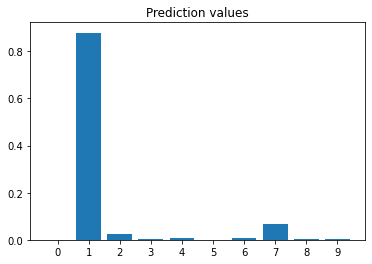

In [ ]:
plt.bar(range(10), predictions[0], tick_label = range(10))
plt.title('Prediction values')
plt.show()
